In [1]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_palette("colorblind")
palette = sns.color_palette()
figsize = (15,8)
legend_fontsize = 16

import warnings
warnings.filterwarnings("ignore")

## Первичный анализ данных(EDA)

Сами данные и их описание на kaggle: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

In [2]:
df = pd.read_csv("CO2_Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [4]:
df.shape

(7385, 12)

In [5]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Пропущенных значений нет, что не может не радовать.

In [6]:
df.duplicated().sum()

1103

А вот повторяющиеся строчек в данных неприлично много, удалим их. 

In [7]:
df= df.drop_duplicates()
df.shape

(6282, 12)

Посмотрим на статистики

In [8]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000,6282.000000
mean,3.161812,5.618911,12.610220,9.070583,11.017876,27.411016,251.157752
std,1.365201,1.846250,3.553066,2.278884,2.946876,7.245318,59.290426
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.700000,10.300000,12.700000,32.000000,289.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Проанализируем зависимость категориальных переменных

In [9]:
def explore_cat_feature(feature):
    group= df.groupby(feature).mean()
    plt.figure(figsize=[15,5])
    plots = group['CO2 Emissions(g/km)'].sort_values().plot(kind = 'bar', fontsize=12)
    plt.xlabel(feature, fontsize=12);
    plt.ylabel('Mean Co2 Emission', fontsize=12);
    plt.title("Mean Co2 Emission vs. {} feature\n".format(feature), fontsize=16)

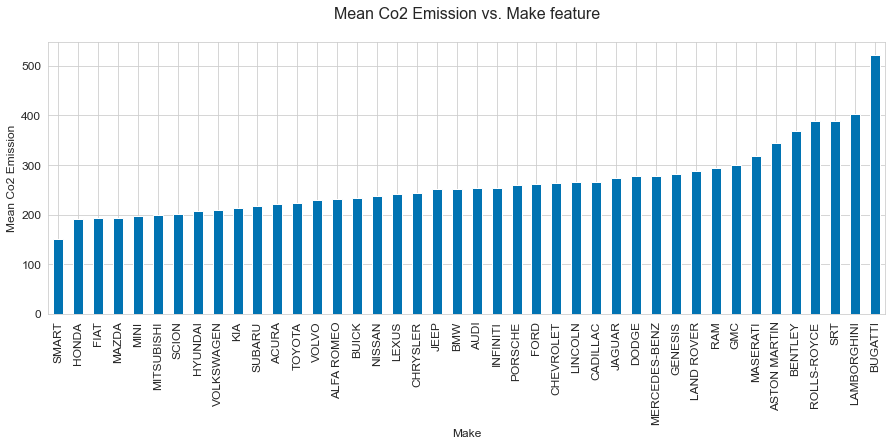

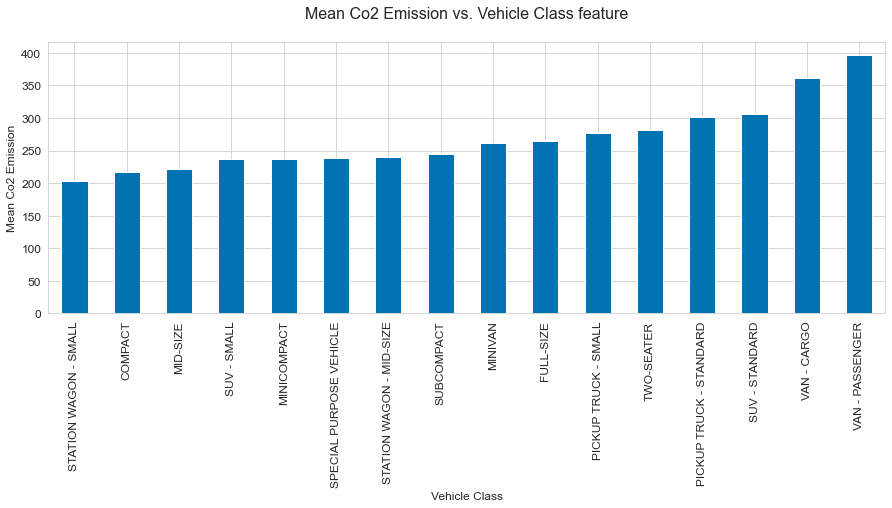

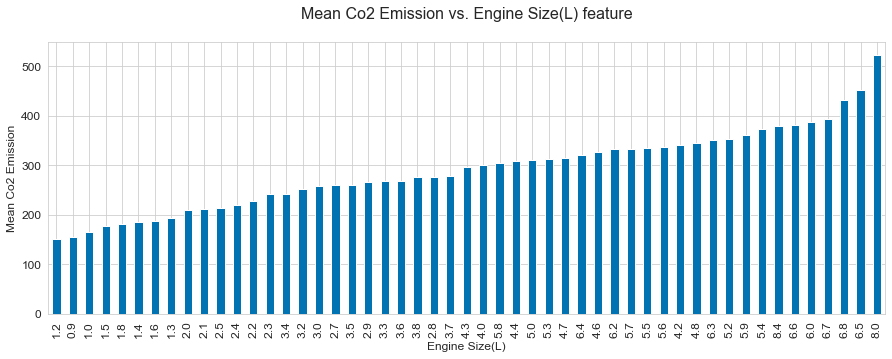

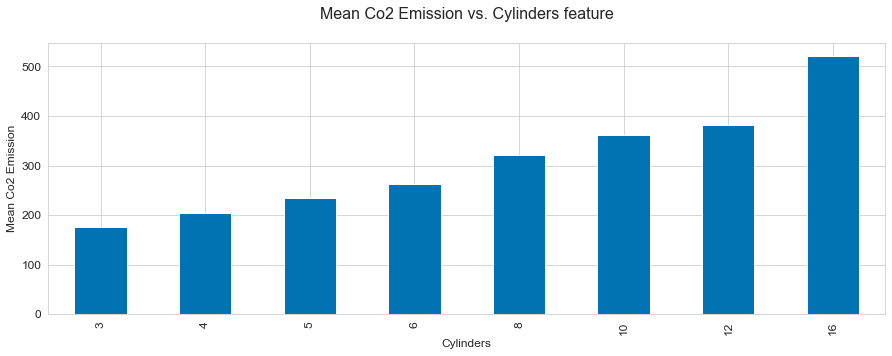

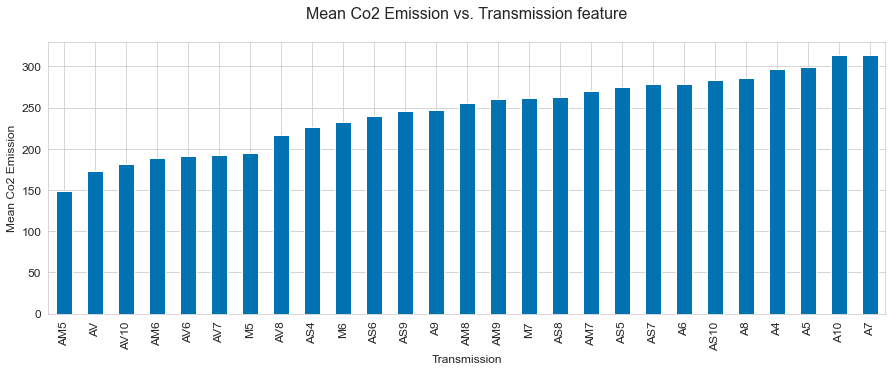

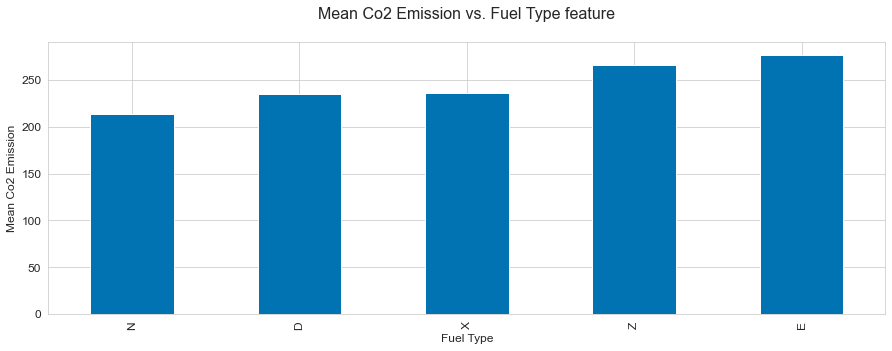

In [10]:
for feature in ['Make', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type']:
    explore_cat_feature(feature)

### Первые наблюдения:
1. Увеличение размера двигателя и числа цилиндров заметно влияет на увеличение объема выбросов CO2
2. Производитель, класс автомобиля и тип коробки передач также влияют на объем выбросов CO2
3. Тип топлива почти не влияет на объем выбросов CO2

In [11]:
def explore_num_feature(feature):
    plt.figure(figsize=[15,5])
    plt.scatter(df[feature], df['CO2 Emissions(g/km)'])
    plt.xlabel(feature, fontsize=12);
    plt.ylabel('Co2 Emission', fontsize=12);
    plt.title(" Co2 Emission vs. {} \n".format(feature), fontsize=16)

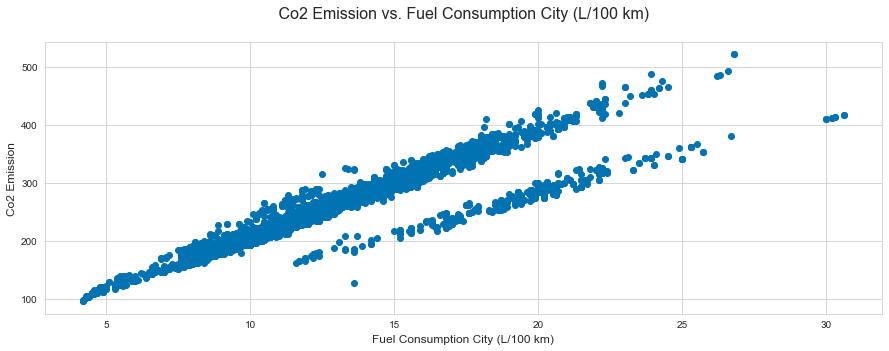

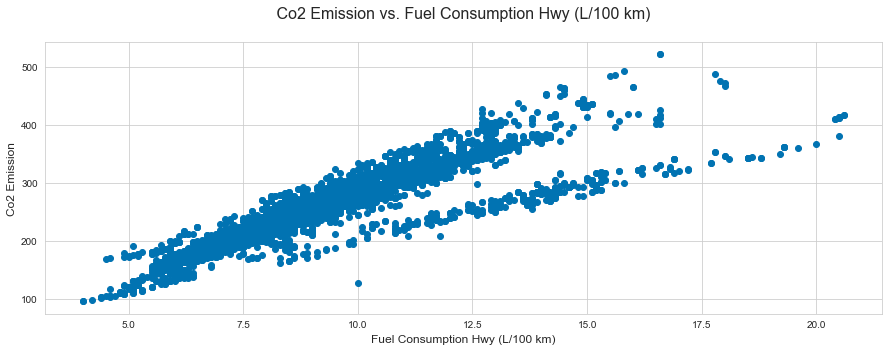

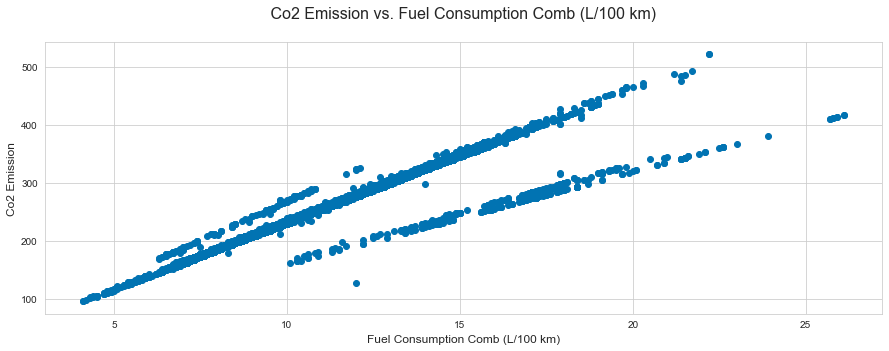

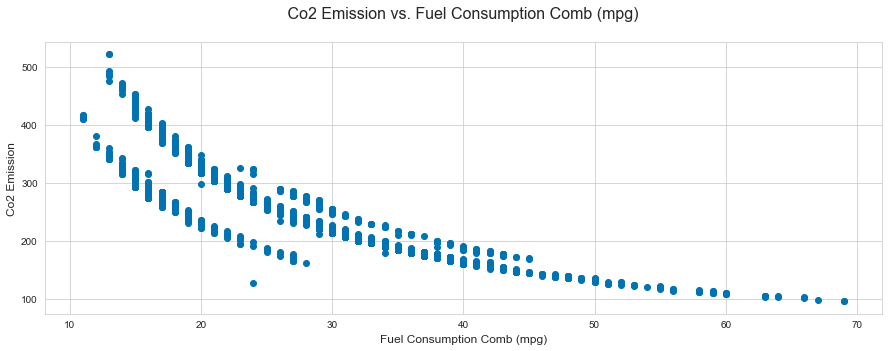

In [12]:
for feature in ['Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']:
    explore_num_feature(feature)

1. Видно, что больший расход топлива на 100 км приводит к большим выбросам
2. Обратно, чем большее расстояние проезжает автомобиль, израсходовав 1 галлон, тем меньше выбросы

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.834228,0.766817,0.820146,-0.762955,0.854802
Cylinders,0.928843,1.000000,0.801277,0.717647,0.781099,-0.723731,0.834687
Fuel Consumption City (L/100 km),0.834228,0.801277,1.000000,0.950811,0.994052,-0.927640,0.918756
Fuel Consumption Hwy (L/100 km),0.766817,0.717647,0.950811,1.000000,0.978607,-0.891892,0.883424
Fuel Consumption Comb (L/100 km),0.820146,0.781099,0.994052,0.978607,1.000000,-0.925801,0.916840
Fuel Consumption Comb (mpg),-0.762955,-0.723731,-0.927640,-0.891892,-0.925801,1.000000,-0.906783
CO2 Emissions(g/km),0.854802,0.834687,0.918756,0.883424,0.916840,-0.906783,1.000000


## Построение моделей

Удалим сначала все категориальные переменные и одинаковые по своему смыслу перемнные.

In [14]:
df2 = df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)', 'Transmission', 'Fuel Type', 'Fuel Consumption Hwy (L/100 km)','Fuel Consumption Comb (mpg)'],axis=1)
df2.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [15]:
X = df2.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df2["CO2 Emissions(g/km)"]

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100500)

***LINEAR & SVM***

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
model_SVM = svm.SVR()
model_SVM.fit(X_train, y_train)

SVR()

In [18]:
print('Training Accuracy: ', model_LR.score(X_train, y_train))
print('Testing Accuracy: ', model_LR.score(X_test, y_test))
print('Mean Cross Val Score: ', cross_val_score(model_LR, X, y, cv = 5, scoring = "r2").mean())

Training Accuracy:  0.8774826526895207
Testing Accuracy:  0.8821819804630857
Mean Cross Val Score:  0.8741530892105999


In [19]:
print('Training Accuracy: ', model_SVM.score(X_train, y_train))
print('Testing Accuracy: ', model_SVM.score(X_test, y_test))
print('Mean Cross Val Score: ', cross_val_score(model_SVM, X, y, cv = 5, scoring = "r2").mean())

Training Accuracy:  0.8831402513834407
Testing Accuracy:  0.8998855384080373
Mean Cross Val Score:  0.8845086264897853


In [20]:
y_pred_LR = model_LR.predict(X_test)
y_pred_SVM = model_SVM.predict(X_test)

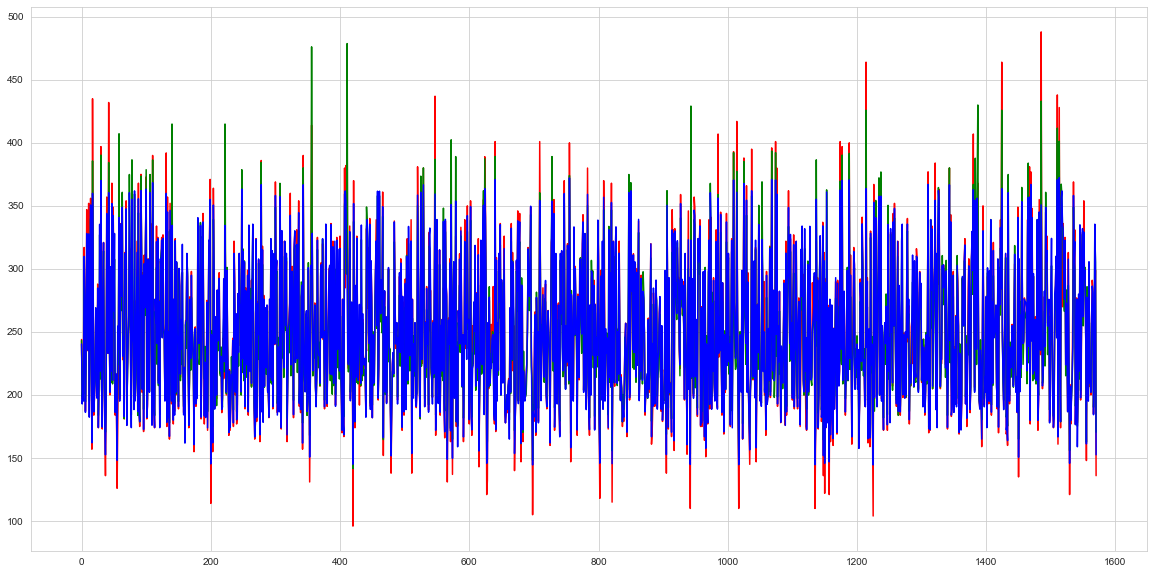

In [21]:
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_figwidth(20)
figure.set_figheight(10)
plt.plot(range(len(y_test)), y_test, 'r') # plotting t, a separately 
plt.plot(range(len(y_test)), y_pred_LR, 'g') # plotting t, b separately 
plt.plot(range(len(y_test)), y_pred_SVM, 'b') # plotting t, c separately 
plt.show()

Теперь перейдем к рассмотрению всех переменных, включая категориальные, предварительно обработав их с помощью one-hot encoding.

In [22]:
df3= pd.get_dummies(df, drop_first=True)
df3.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Make_ALFA ROMEO,Make_ASTON MARTIN,Make_AUDI,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,9.9,6.7,8.5,33,196,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,11.2,7.7,9.6,29,221,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,4,6.0,5.8,5.9,48,136,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5,6,12.7,9.1,11.1,25,255,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,12.1,8.7,10.6,27,244,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
X = df3.drop(['CO2 Emissions(g/km)'], axis= 1)
y = df3["CO2 Emissions(g/km)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100500)

***RIDGE***

In [24]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha =0.001,  normalize = True).fit(X_train,y_train)
print('Training Accuracy: ', ridge.score(X_train, y_train))
print('Testing Accuracy: ', ridge.score(X_test, y_test))

Training Accuracy:  0.9971624280487148
Testing Accuracy:  0.9900284434349267


***LASSO***

In [25]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01).fit(X_train, y_train)
print('Training Accuracy: ', lasso.score(X_train, y_train))
print('Testing Accuracy: ', lasso.score(X_test, y_test))

Training Accuracy:  0.9930905169216181
Testing Accuracy:  0.99360408876731


***Random Forest***

In [26]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train, y_train)
print('Training Accuracy: ', rf.score(X_train, y_train))
print('Testing Accuracy: ', rf.score(X_test, y_test))

Training Accuracy:  0.9991439850306099
Testing Accuracy:  0.9939125547234124


***CatBoost***

In [27]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor()

cb.fit(X_train,y_train)

print('Training Accuracy: ', cb.score(X_train, y_train))
print('Testing Accuracy: ', cb.score(X_test, y_test))

Learning rate set to 0.051737
0:	learn: 56.8859531	total: 67.5ms	remaining: 1m 7s
1:	learn: 54.3476236	total: 70.8ms	remaining: 35.3s
2:	learn: 51.9081841	total: 74ms	remaining: 24.6s
3:	learn: 49.7945663	total: 77.9ms	remaining: 19.4s
4:	learn: 47.6646467	total: 81.1ms	remaining: 16.1s
5:	learn: 45.6053455	total: 84.7ms	remaining: 14s
6:	learn: 43.7649282	total: 87.7ms	remaining: 12.4s
7:	learn: 41.8296836	total: 90.3ms	remaining: 11.2s
8:	learn: 40.1215077	total: 93ms	remaining: 10.2s
9:	learn: 38.4953584	total: 95.8ms	remaining: 9.48s
10:	learn: 36.8679990	total: 98.8ms	remaining: 8.88s
11:	learn: 35.2844485	total: 102ms	remaining: 8.36s
12:	learn: 33.8144826	total: 104ms	remaining: 7.93s
13:	learn: 32.4320067	total: 107ms	remaining: 7.56s
14:	learn: 31.0307188	total: 110ms	remaining: 7.24s
15:	learn: 29.7152742	total: 113ms	remaining: 6.97s
16:	learn: 28.5000241	total: 116ms	remaining: 6.73s
17:	learn: 27.3602815	total: 119ms	remaining: 6.51s
18:	learn: 26.2145297	total: 122ms	rema

167:	learn: 4.1783066	total: 580ms	remaining: 2.87s
168:	learn: 4.1639392	total: 583ms	remaining: 2.87s
169:	learn: 4.1610264	total: 585ms	remaining: 2.86s
170:	learn: 4.1585203	total: 588ms	remaining: 2.85s
171:	learn: 4.1554838	total: 591ms	remaining: 2.85s
172:	learn: 4.1439272	total: 594ms	remaining: 2.84s
173:	learn: 4.1283398	total: 597ms	remaining: 2.83s
174:	learn: 4.1257997	total: 600ms	remaining: 2.83s
175:	learn: 4.1128471	total: 603ms	remaining: 2.82s
176:	learn: 4.1098800	total: 606ms	remaining: 2.82s
177:	learn: 4.1073838	total: 609ms	remaining: 2.81s
178:	learn: 4.0917751	total: 612ms	remaining: 2.81s
179:	learn: 4.0888307	total: 615ms	remaining: 2.8s
180:	learn: 4.0859129	total: 617ms	remaining: 2.79s
181:	learn: 4.0832186	total: 620ms	remaining: 2.79s
182:	learn: 4.0808443	total: 623ms	remaining: 2.78s
183:	learn: 4.0647623	total: 626ms	remaining: 2.77s
184:	learn: 4.0625008	total: 629ms	remaining: 2.77s
185:	learn: 4.0596593	total: 632ms	remaining: 2.76s
186:	learn: 4

366:	learn: 3.1781902	total: 1.17s	remaining: 2.02s
367:	learn: 3.1776576	total: 1.17s	remaining: 2.02s
368:	learn: 3.1768057	total: 1.18s	remaining: 2.01s
369:	learn: 3.1752585	total: 1.18s	remaining: 2.01s
370:	learn: 3.1696394	total: 1.18s	remaining: 2s
371:	learn: 3.1685111	total: 1.18s	remaining: 2s
372:	learn: 3.1676864	total: 1.19s	remaining: 2s
373:	learn: 3.1671642	total: 1.19s	remaining: 1.99s
374:	learn: 3.1663966	total: 1.19s	remaining: 1.99s
375:	learn: 3.1658869	total: 1.2s	remaining: 1.98s
376:	learn: 3.1604153	total: 1.2s	remaining: 1.98s
377:	learn: 3.1596130	total: 1.2s	remaining: 1.98s
378:	learn: 3.1588692	total: 1.2s	remaining: 1.97s
379:	learn: 3.1535901	total: 1.21s	remaining: 1.97s
380:	learn: 3.1528110	total: 1.21s	remaining: 1.97s
381:	learn: 3.1519161	total: 1.21s	remaining: 1.96s
382:	learn: 3.1506306	total: 1.22s	remaining: 1.96s
383:	learn: 3.1496006	total: 1.22s	remaining: 1.96s
384:	learn: 3.1472425	total: 1.22s	remaining: 1.95s
385:	learn: 3.1466952	tot

569:	learn: 2.8644221	total: 1.76s	remaining: 1.33s
570:	learn: 2.8639256	total: 1.76s	remaining: 1.33s
571:	learn: 2.8597980	total: 1.77s	remaining: 1.32s
572:	learn: 2.8584129	total: 1.77s	remaining: 1.32s
573:	learn: 2.8563283	total: 1.77s	remaining: 1.32s
574:	learn: 2.8557894	total: 1.78s	remaining: 1.31s
575:	learn: 2.8554211	total: 1.78s	remaining: 1.31s
576:	learn: 2.8525520	total: 1.78s	remaining: 1.31s
577:	learn: 2.8522091	total: 1.79s	remaining: 1.3s
578:	learn: 2.8488787	total: 1.79s	remaining: 1.3s
579:	learn: 2.8459009	total: 1.79s	remaining: 1.3s
580:	learn: 2.8448763	total: 1.79s	remaining: 1.29s
581:	learn: 2.8444067	total: 1.8s	remaining: 1.29s
582:	learn: 2.8433009	total: 1.8s	remaining: 1.29s
583:	learn: 2.8430109	total: 1.8s	remaining: 1.28s
584:	learn: 2.8422797	total: 1.81s	remaining: 1.28s
585:	learn: 2.8418036	total: 1.81s	remaining: 1.28s
586:	learn: 2.8386455	total: 1.81s	remaining: 1.27s
587:	learn: 2.8382113	total: 1.81s	remaining: 1.27s
588:	learn: 2.8348

772:	learn: 2.6712834	total: 2.35s	remaining: 692ms
773:	learn: 2.6689957	total: 2.36s	remaining: 689ms
774:	learn: 2.6684370	total: 2.36s	remaining: 685ms
775:	learn: 2.6680209	total: 2.36s	remaining: 682ms
776:	learn: 2.6663247	total: 2.37s	remaining: 679ms
777:	learn: 2.6658889	total: 2.37s	remaining: 676ms
778:	learn: 2.6656696	total: 2.37s	remaining: 673ms
779:	learn: 2.6652263	total: 2.38s	remaining: 670ms
780:	learn: 2.6648698	total: 2.38s	remaining: 667ms
781:	learn: 2.6637164	total: 2.38s	remaining: 664ms
782:	learn: 2.6635037	total: 2.38s	remaining: 661ms
783:	learn: 2.6632869	total: 2.39s	remaining: 658ms
784:	learn: 2.6628404	total: 2.39s	remaining: 655ms
785:	learn: 2.6606895	total: 2.39s	remaining: 652ms
786:	learn: 2.6571852	total: 2.4s	remaining: 649ms
787:	learn: 2.6568105	total: 2.4s	remaining: 645ms
788:	learn: 2.6564821	total: 2.4s	remaining: 642ms
789:	learn: 2.6537905	total: 2.4s	remaining: 639ms
790:	learn: 2.6533361	total: 2.41s	remaining: 636ms
791:	learn: 2.65

975:	learn: 2.5095235	total: 2.95s	remaining: 72.5ms
976:	learn: 2.5080669	total: 2.95s	remaining: 69.4ms
977:	learn: 2.5061587	total: 2.95s	remaining: 66.4ms
978:	learn: 2.5059968	total: 2.96s	remaining: 63.4ms
979:	learn: 2.5045788	total: 2.96s	remaining: 60.4ms
980:	learn: 2.5034176	total: 2.96s	remaining: 57.4ms
981:	learn: 2.5019027	total: 2.96s	remaining: 54.3ms
982:	learn: 2.5014970	total: 2.97s	remaining: 51.3ms
983:	learn: 2.5011985	total: 2.97s	remaining: 48.3ms
984:	learn: 2.4995600	total: 2.97s	remaining: 45.3ms
985:	learn: 2.4980583	total: 2.98s	remaining: 42.2ms
986:	learn: 2.4978291	total: 2.98s	remaining: 39.2ms
987:	learn: 2.4965851	total: 2.98s	remaining: 36.2ms
988:	learn: 2.4962627	total: 2.98s	remaining: 33.2ms
989:	learn: 2.4959912	total: 2.99s	remaining: 30.2ms
990:	learn: 2.4950227	total: 2.99s	remaining: 27.2ms
991:	learn: 2.4947663	total: 2.99s	remaining: 24.1ms
992:	learn: 2.4945739	total: 3s	remaining: 21.1ms
993:	learn: 2.4940060	total: 3s	remaining: 18.1ms

In [28]:
from sklearn.model_selection import cross_val_score
print('Lasso Cross Validation: ' , cross_val_score(lasso, X, y, cv=5, scoring = "r2").mean())
print('RandomForest Cross Validation: ' , cross_val_score(rf, X, y, cv=5, scoring = "r2").mean())
print('CatBoost Cross Validation: ' , cross_val_score(cb, X, y, cv=5, scoring = "r2").mean())

Lasso Cross Validation:  0.9910616635803351
RandomForest Cross Validation:  0.9934625755849066
Learning rate set to 0.05284
0:	learn: 55.9893761	total: 5.54ms	remaining: 5.54s
1:	learn: 53.3884630	total: 10.9ms	remaining: 5.42s
2:	learn: 50.8832123	total: 17.4ms	remaining: 5.78s
3:	learn: 48.4911295	total: 21.2ms	remaining: 5.28s
4:	learn: 46.4399705	total: 24.4ms	remaining: 4.86s
5:	learn: 44.4713634	total: 27.5ms	remaining: 4.56s
6:	learn: 42.6435709	total: 31.2ms	remaining: 4.42s
7:	learn: 40.7299362	total: 41.4ms	remaining: 5.13s
8:	learn: 39.0502462	total: 44.4ms	remaining: 4.89s
9:	learn: 37.3197607	total: 47.8ms	remaining: 4.73s
10:	learn: 35.6616523	total: 50.9ms	remaining: 4.58s
11:	learn: 34.0258819	total: 54.2ms	remaining: 4.46s
12:	learn: 32.7054065	total: 57.2ms	remaining: 4.34s
13:	learn: 31.3218084	total: 60.4ms	remaining: 4.25s
14:	learn: 29.9362625	total: 63.6ms	remaining: 4.18s
15:	learn: 28.6765335	total: 66.9ms	remaining: 4.11s
16:	learn: 27.5207616	total: 70.1ms	re

188:	learn: 3.5694791	total: 617ms	remaining: 2.65s
189:	learn: 3.5676339	total: 620ms	remaining: 2.64s
190:	learn: 3.5546919	total: 623ms	remaining: 2.64s
191:	learn: 3.5531733	total: 627ms	remaining: 2.64s
192:	learn: 3.5514455	total: 630ms	remaining: 2.63s
193:	learn: 3.5486014	total: 633ms	remaining: 2.63s
194:	learn: 3.5170636	total: 636ms	remaining: 2.63s
195:	learn: 3.5154047	total: 639ms	remaining: 2.62s
196:	learn: 3.5128444	total: 642ms	remaining: 2.62s
197:	learn: 3.5114833	total: 645ms	remaining: 2.61s
198:	learn: 3.5026461	total: 648ms	remaining: 2.61s
199:	learn: 3.4901512	total: 651ms	remaining: 2.6s
200:	learn: 3.4885561	total: 654ms	remaining: 2.6s
201:	learn: 3.4859112	total: 659ms	remaining: 2.6s
202:	learn: 3.4844186	total: 663ms	remaining: 2.6s
203:	learn: 3.4543012	total: 666ms	remaining: 2.6s
204:	learn: 3.4528626	total: 669ms	remaining: 2.59s
205:	learn: 3.4513789	total: 672ms	remaining: 2.59s
206:	learn: 3.4499724	total: 677ms	remaining: 2.59s
207:	learn: 3.448

372:	learn: 2.8081770	total: 1.21s	remaining: 2.03s
373:	learn: 2.8070190	total: 1.22s	remaining: 2.04s
374:	learn: 2.8029246	total: 1.22s	remaining: 2.03s
375:	learn: 2.8013012	total: 1.22s	remaining: 2.03s
376:	learn: 2.8005486	total: 1.23s	remaining: 2.02s
377:	learn: 2.7995845	total: 1.23s	remaining: 2.02s
378:	learn: 2.7983188	total: 1.23s	remaining: 2.02s
379:	learn: 2.7946861	total: 1.24s	remaining: 2.02s
380:	learn: 2.7941801	total: 1.24s	remaining: 2.01s
381:	learn: 2.7897978	total: 1.24s	remaining: 2.01s
382:	learn: 2.7893010	total: 1.24s	remaining: 2s
383:	learn: 2.7863862	total: 1.25s	remaining: 2s
384:	learn: 2.7839786	total: 1.25s	remaining: 2s
385:	learn: 2.7810164	total: 1.25s	remaining: 1.99s
386:	learn: 2.7805198	total: 1.26s	remaining: 1.99s
387:	learn: 2.7800300	total: 1.26s	remaining: 1.99s
388:	learn: 2.7795475	total: 1.26s	remaining: 1.98s
389:	learn: 2.7790680	total: 1.26s	remaining: 1.98s
390:	learn: 2.7783111	total: 1.27s	remaining: 1.97s
391:	learn: 2.7774356

555:	learn: 2.5705553	total: 1.8s	remaining: 1.43s
556:	learn: 2.5702479	total: 1.8s	remaining: 1.43s
557:	learn: 2.5697982	total: 1.8s	remaining: 1.43s
558:	learn: 2.5690046	total: 1.8s	remaining: 1.42s
559:	learn: 2.5687012	total: 1.81s	remaining: 1.42s
560:	learn: 2.5684247	total: 1.81s	remaining: 1.42s
561:	learn: 2.5677501	total: 1.81s	remaining: 1.41s
562:	learn: 2.5673346	total: 1.82s	remaining: 1.41s
563:	learn: 2.5666674	total: 1.82s	remaining: 1.41s
564:	learn: 2.5663764	total: 1.82s	remaining: 1.4s
565:	learn: 2.5660874	total: 1.82s	remaining: 1.4s
566:	learn: 2.5654967	total: 1.83s	remaining: 1.4s
567:	learn: 2.5652102	total: 1.83s	remaining: 1.39s
568:	learn: 2.5649389	total: 1.84s	remaining: 1.39s
569:	learn: 2.5643580	total: 1.84s	remaining: 1.39s
570:	learn: 2.5637203	total: 1.84s	remaining: 1.38s
571:	learn: 2.5613899	total: 1.84s	remaining: 1.38s
572:	learn: 2.5591756	total: 1.85s	remaining: 1.38s
573:	learn: 2.5588924	total: 1.85s	remaining: 1.37s
574:	learn: 2.55737

744:	learn: 2.4052331	total: 2.38s	remaining: 816ms
745:	learn: 2.4047231	total: 2.39s	remaining: 813ms
746:	learn: 2.4044935	total: 2.39s	remaining: 810ms
747:	learn: 2.4037801	total: 2.39s	remaining: 807ms
748:	learn: 2.4035741	total: 2.4s	remaining: 803ms
749:	learn: 2.4030839	total: 2.4s	remaining: 800ms
750:	learn: 2.4027018	total: 2.4s	remaining: 796ms
751:	learn: 2.3987923	total: 2.4s	remaining: 793ms
752:	learn: 2.3983757	total: 2.41s	remaining: 790ms
753:	learn: 2.3968978	total: 2.41s	remaining: 787ms
754:	learn: 2.3966390	total: 2.41s	remaining: 783ms
755:	learn: 2.3962620	total: 2.42s	remaining: 780ms
756:	learn: 2.3957506	total: 2.42s	remaining: 777ms
757:	learn: 2.3954265	total: 2.42s	remaining: 774ms
758:	learn: 2.3950488	total: 2.42s	remaining: 770ms
759:	learn: 2.3948557	total: 2.43s	remaining: 767ms
760:	learn: 2.3946384	total: 2.43s	remaining: 764ms
761:	learn: 2.3921453	total: 2.44s	remaining: 761ms
762:	learn: 2.3919446	total: 2.44s	remaining: 758ms
763:	learn: 2.39

928:	learn: 2.2880315	total: 2.97s	remaining: 227ms
929:	learn: 2.2877473	total: 2.98s	remaining: 224ms
930:	learn: 2.2875898	total: 2.98s	remaining: 221ms
931:	learn: 2.2874275	total: 2.98s	remaining: 218ms
932:	learn: 2.2866563	total: 2.99s	remaining: 215ms
933:	learn: 2.2861676	total: 2.99s	remaining: 211ms
934:	learn: 2.2860124	total: 2.99s	remaining: 208ms
935:	learn: 2.2844636	total: 3s	remaining: 205ms
936:	learn: 2.2842079	total: 3s	remaining: 202ms
937:	learn: 2.2822176	total: 3s	remaining: 199ms
938:	learn: 2.2818744	total: 3.01s	remaining: 195ms
939:	learn: 2.2812340	total: 3.01s	remaining: 192ms
940:	learn: 2.2810917	total: 3.01s	remaining: 189ms
941:	learn: 2.2798644	total: 3.02s	remaining: 186ms
942:	learn: 2.2796913	total: 3.02s	remaining: 183ms
943:	learn: 2.2795186	total: 3.02s	remaining: 179ms
944:	learn: 2.2774881	total: 3.02s	remaining: 176ms
945:	learn: 2.2773150	total: 3.03s	remaining: 173ms
946:	learn: 2.2757110	total: 3.03s	remaining: 170ms
947:	learn: 2.2752579

118:	learn: 4.2568678	total: 387ms	remaining: 2.87s
119:	learn: 4.2430419	total: 390ms	remaining: 2.86s
120:	learn: 4.2308401	total: 393ms	remaining: 2.86s
121:	learn: 4.2123189	total: 396ms	remaining: 2.85s
122:	learn: 4.2026376	total: 402ms	remaining: 2.87s
123:	learn: 4.1892491	total: 405ms	remaining: 2.86s
124:	learn: 4.1737787	total: 408ms	remaining: 2.86s
125:	learn: 4.1616029	total: 413ms	remaining: 2.87s
126:	learn: 4.1568438	total: 417ms	remaining: 2.86s
127:	learn: 4.1375875	total: 419ms	remaining: 2.86s
128:	learn: 4.1307618	total: 423ms	remaining: 2.85s
129:	learn: 4.0849714	total: 427ms	remaining: 2.86s
130:	learn: 4.0740103	total: 434ms	remaining: 2.88s
131:	learn: 4.0646209	total: 437ms	remaining: 2.87s
132:	learn: 4.0272328	total: 440ms	remaining: 2.87s
133:	learn: 4.0231473	total: 443ms	remaining: 2.86s
134:	learn: 4.0175962	total: 446ms	remaining: 2.86s
135:	learn: 4.0042539	total: 449ms	remaining: 2.85s
136:	learn: 3.9674548	total: 452ms	remaining: 2.85s
137:	learn: 

304:	learn: 3.0597682	total: 979ms	remaining: 2.23s
305:	learn: 3.0588233	total: 987ms	remaining: 2.24s
306:	learn: 3.0543820	total: 990ms	remaining: 2.23s
307:	learn: 3.0506783	total: 993ms	remaining: 2.23s
308:	learn: 3.0450593	total: 996ms	remaining: 2.23s
309:	learn: 3.0429643	total: 999ms	remaining: 2.22s
310:	learn: 3.0421498	total: 1s	remaining: 2.22s
311:	learn: 3.0412388	total: 1s	remaining: 2.22s
312:	learn: 3.0400234	total: 1.01s	remaining: 2.21s
313:	learn: 3.0390449	total: 1.02s	remaining: 2.23s
314:	learn: 3.0381439	total: 1.02s	remaining: 2.23s
315:	learn: 3.0366790	total: 1.03s	remaining: 2.22s
316:	learn: 3.0351228	total: 1.03s	remaining: 2.22s
317:	learn: 3.0311414	total: 1.03s	remaining: 2.21s
318:	learn: 3.0302181	total: 1.03s	remaining: 2.21s
319:	learn: 3.0295993	total: 1.04s	remaining: 2.21s
320:	learn: 3.0289960	total: 1.04s	remaining: 2.2s
321:	learn: 3.0279987	total: 1.04s	remaining: 2.2s
322:	learn: 3.0267732	total: 1.05s	remaining: 2.19s
323:	learn: 3.024828

485:	learn: 2.7695278	total: 1.57s	remaining: 1.66s
486:	learn: 2.7689704	total: 1.57s	remaining: 1.66s
487:	learn: 2.7671080	total: 1.58s	remaining: 1.65s
488:	learn: 2.7664797	total: 1.58s	remaining: 1.65s
489:	learn: 2.7657443	total: 1.58s	remaining: 1.65s
490:	learn: 2.7654031	total: 1.58s	remaining: 1.64s
491:	learn: 2.7643238	total: 1.59s	remaining: 1.64s
492:	learn: 2.7619913	total: 1.59s	remaining: 1.64s
493:	learn: 2.7579937	total: 1.59s	remaining: 1.63s
494:	learn: 2.7563913	total: 1.6s	remaining: 1.63s
495:	learn: 2.7533981	total: 1.6s	remaining: 1.63s
496:	learn: 2.7498576	total: 1.6s	remaining: 1.62s
497:	learn: 2.7451434	total: 1.61s	remaining: 1.62s
498:	learn: 2.7447311	total: 1.61s	remaining: 1.62s
499:	learn: 2.7443573	total: 1.62s	remaining: 1.62s
500:	learn: 2.7438206	total: 1.62s	remaining: 1.61s
501:	learn: 2.7434423	total: 1.62s	remaining: 1.61s
502:	learn: 2.7429164	total: 1.63s	remaining: 1.61s
503:	learn: 2.7404385	total: 1.63s	remaining: 1.6s
504:	learn: 2.74

670:	learn: 2.5769697	total: 2.16s	remaining: 1.06s
671:	learn: 2.5765478	total: 2.16s	remaining: 1.05s
672:	learn: 2.5760042	total: 2.16s	remaining: 1.05s
673:	learn: 2.5749567	total: 2.17s	remaining: 1.05s
674:	learn: 2.5745774	total: 2.17s	remaining: 1.04s
675:	learn: 2.5740849	total: 2.17s	remaining: 1.04s
676:	learn: 2.5718554	total: 2.18s	remaining: 1.04s
677:	learn: 2.5714127	total: 2.18s	remaining: 1.03s
678:	learn: 2.5705389	total: 2.18s	remaining: 1.03s
679:	learn: 2.5701552	total: 2.18s	remaining: 1.03s
680:	learn: 2.5697560	total: 2.19s	remaining: 1.02s
681:	learn: 2.5695012	total: 2.19s	remaining: 1.02s
682:	learn: 2.5692485	total: 2.19s	remaining: 1.02s
683:	learn: 2.5688881	total: 2.19s	remaining: 1.01s
684:	learn: 2.5660574	total: 2.2s	remaining: 1.01s
685:	learn: 2.5656414	total: 2.21s	remaining: 1.01s
686:	learn: 2.5652414	total: 2.21s	remaining: 1.01s
687:	learn: 2.5648547	total: 2.21s	remaining: 1s
688:	learn: 2.5637914	total: 2.21s	remaining: 1s
689:	learn: 2.56343

849:	learn: 2.4281673	total: 2.75s	remaining: 485ms
850:	learn: 2.4261787	total: 2.75s	remaining: 482ms
851:	learn: 2.4259536	total: 2.76s	remaining: 479ms
852:	learn: 2.4245264	total: 2.76s	remaining: 476ms
853:	learn: 2.4243378	total: 2.76s	remaining: 472ms
854:	learn: 2.4241096	total: 2.77s	remaining: 469ms
855:	learn: 2.4239250	total: 2.77s	remaining: 466ms
856:	learn: 2.4222060	total: 2.77s	remaining: 462ms
857:	learn: 2.4219948	total: 2.77s	remaining: 459ms
858:	learn: 2.4216770	total: 2.78s	remaining: 456ms
859:	learn: 2.4214455	total: 2.78s	remaining: 453ms
860:	learn: 2.4212379	total: 2.78s	remaining: 449ms
861:	learn: 2.4209249	total: 2.79s	remaining: 446ms
862:	learn: 2.4207129	total: 2.79s	remaining: 443ms
863:	learn: 2.4205063	total: 2.79s	remaining: 440ms
864:	learn: 2.4201272	total: 2.79s	remaining: 436ms
865:	learn: 2.4181656	total: 2.8s	remaining: 433ms
866:	learn: 2.4179634	total: 2.8s	remaining: 430ms
867:	learn: 2.4176172	total: 2.8s	remaining: 426ms
868:	learn: 2.4

54:	learn: 8.0989986	total: 193ms	remaining: 3.32s
55:	learn: 7.8981738	total: 196ms	remaining: 3.31s
56:	learn: 7.7147052	total: 199ms	remaining: 3.29s
57:	learn: 7.5784103	total: 205ms	remaining: 3.33s
58:	learn: 7.4598593	total: 208ms	remaining: 3.31s
59:	learn: 7.3331771	total: 211ms	remaining: 3.3s
60:	learn: 7.2144761	total: 214ms	remaining: 3.29s
61:	learn: 7.1005501	total: 217ms	remaining: 3.29s
62:	learn: 6.9927281	total: 220ms	remaining: 3.27s
63:	learn: 6.9091398	total: 223ms	remaining: 3.27s
64:	learn: 6.8247471	total: 227ms	remaining: 3.26s
65:	learn: 6.7291512	total: 230ms	remaining: 3.25s
66:	learn: 6.6409395	total: 234ms	remaining: 3.26s
67:	learn: 6.5050731	total: 237ms	remaining: 3.25s
68:	learn: 6.3873359	total: 240ms	remaining: 3.24s
69:	learn: 6.3029429	total: 243ms	remaining: 3.23s
70:	learn: 6.2358823	total: 246ms	remaining: 3.22s
71:	learn: 6.1041854	total: 249ms	remaining: 3.21s
72:	learn: 6.0453324	total: 256ms	remaining: 3.25s
73:	learn: 5.9877264	total: 259m

238:	learn: 3.5921623	total: 781ms	remaining: 2.49s
239:	learn: 3.5907500	total: 784ms	remaining: 2.48s
240:	learn: 3.5898031	total: 787ms	remaining: 2.48s
241:	learn: 3.5811850	total: 791ms	remaining: 2.48s
242:	learn: 3.5796026	total: 793ms	remaining: 2.47s
243:	learn: 3.5786848	total: 796ms	remaining: 2.47s
244:	learn: 3.5699496	total: 799ms	remaining: 2.46s
245:	learn: 3.5652230	total: 802ms	remaining: 2.46s
246:	learn: 3.5643152	total: 805ms	remaining: 2.45s
247:	learn: 3.5548036	total: 810ms	remaining: 2.46s
248:	learn: 3.5455688	total: 813ms	remaining: 2.45s
249:	learn: 3.5440604	total: 816ms	remaining: 2.45s
250:	learn: 3.5304530	total: 820ms	remaining: 2.45s
251:	learn: 3.5146833	total: 823ms	remaining: 2.44s
252:	learn: 3.5091709	total: 826ms	remaining: 2.44s
253:	learn: 3.5050946	total: 829ms	remaining: 2.43s
254:	learn: 3.5042371	total: 832ms	remaining: 2.43s
255:	learn: 3.5033971	total: 837ms	remaining: 2.43s
256:	learn: 3.4957502	total: 840ms	remaining: 2.43s
257:	learn: 

423:	learn: 3.0684508	total: 1.38s	remaining: 1.88s
424:	learn: 3.0677678	total: 1.39s	remaining: 1.87s
425:	learn: 3.0628637	total: 1.39s	remaining: 1.87s
426:	learn: 3.0620116	total: 1.39s	remaining: 1.87s
427:	learn: 3.0610747	total: 1.39s	remaining: 1.86s
428:	learn: 3.0577632	total: 1.4s	remaining: 1.86s
429:	learn: 3.0552206	total: 1.4s	remaining: 1.86s
430:	learn: 3.0547628	total: 1.4s	remaining: 1.85s
431:	learn: 3.0512404	total: 1.41s	remaining: 1.85s
432:	learn: 3.0484104	total: 1.41s	remaining: 1.85s
433:	learn: 3.0440834	total: 1.41s	remaining: 1.84s
434:	learn: 3.0407038	total: 1.42s	remaining: 1.84s
435:	learn: 3.0397570	total: 1.42s	remaining: 1.83s
436:	learn: 3.0390701	total: 1.42s	remaining: 1.83s
437:	learn: 3.0384285	total: 1.43s	remaining: 1.83s
438:	learn: 3.0378071	total: 1.43s	remaining: 1.82s
439:	learn: 3.0373544	total: 1.43s	remaining: 1.82s
440:	learn: 3.0369257	total: 1.43s	remaining: 1.82s
441:	learn: 3.0359334	total: 1.44s	remaining: 1.81s
442:	learn: 3.0

603:	learn: 2.8045212	total: 1.97s	remaining: 1.29s
604:	learn: 2.8040336	total: 1.97s	remaining: 1.29s
605:	learn: 2.8022160	total: 1.98s	remaining: 1.28s
606:	learn: 2.8015827	total: 1.98s	remaining: 1.28s
607:	learn: 2.8012780	total: 1.98s	remaining: 1.28s
608:	learn: 2.8009763	total: 1.99s	remaining: 1.28s
609:	learn: 2.8005016	total: 1.99s	remaining: 1.27s
610:	learn: 2.8002020	total: 1.99s	remaining: 1.27s
611:	learn: 2.7997246	total: 2s	remaining: 1.27s
612:	learn: 2.7960805	total: 2s	remaining: 1.26s
613:	learn: 2.7932698	total: 2.01s	remaining: 1.26s
614:	learn: 2.7929691	total: 2.01s	remaining: 1.26s
615:	learn: 2.7924627	total: 2.03s	remaining: 1.26s
616:	learn: 2.7902975	total: 2.03s	remaining: 1.26s
617:	learn: 2.7898913	total: 2.03s	remaining: 1.26s
618:	learn: 2.7863261	total: 2.04s	remaining: 1.25s
619:	learn: 2.7833553	total: 2.04s	remaining: 1.25s
620:	learn: 2.7830567	total: 2.04s	remaining: 1.25s
621:	learn: 2.7827610	total: 2.04s	remaining: 1.24s
622:	learn: 2.7819

774:	learn: 2.6454776	total: 2.56s	remaining: 743ms
775:	learn: 2.6440903	total: 2.56s	remaining: 740ms
776:	learn: 2.6437165	total: 2.57s	remaining: 737ms
777:	learn: 2.6401031	total: 2.57s	remaining: 733ms
778:	learn: 2.6397406	total: 2.57s	remaining: 730ms
779:	learn: 2.6394948	total: 2.58s	remaining: 727ms
780:	learn: 2.6392415	total: 2.58s	remaining: 723ms
781:	learn: 2.6388453	total: 2.58s	remaining: 720ms
782:	learn: 2.6386211	total: 2.58s	remaining: 716ms
783:	learn: 2.6369612	total: 2.59s	remaining: 713ms
784:	learn: 2.6352405	total: 2.59s	remaining: 710ms
785:	learn: 2.6347016	total: 2.59s	remaining: 706ms
786:	learn: 2.6343479	total: 2.6s	remaining: 703ms
787:	learn: 2.6339677	total: 2.6s	remaining: 699ms
788:	learn: 2.6327348	total: 2.6s	remaining: 696ms
789:	learn: 2.6324888	total: 2.6s	remaining: 693ms
790:	learn: 2.6302989	total: 2.61s	remaining: 690ms
791:	learn: 2.6299000	total: 2.61s	remaining: 687ms
792:	learn: 2.6295553	total: 2.62s	remaining: 683ms
793:	learn: 2.62

954:	learn: 2.5314971	total: 3.15s	remaining: 149ms
955:	learn: 2.5312336	total: 3.15s	remaining: 145ms
956:	learn: 2.5308224	total: 3.16s	remaining: 142ms
957:	learn: 2.5300053	total: 3.16s	remaining: 139ms
958:	learn: 2.5289210	total: 3.17s	remaining: 135ms
959:	learn: 2.5286686	total: 3.17s	remaining: 132ms
960:	learn: 2.5262058	total: 3.17s	remaining: 129ms
961:	learn: 2.5260204	total: 3.17s	remaining: 125ms
962:	learn: 2.5256773	total: 3.18s	remaining: 122ms
963:	learn: 2.5254792	total: 3.18s	remaining: 119ms
964:	learn: 2.5249266	total: 3.18s	remaining: 115ms
965:	learn: 2.5234808	total: 3.19s	remaining: 112ms
966:	learn: 2.5233051	total: 3.19s	remaining: 109ms
967:	learn: 2.5223665	total: 3.19s	remaining: 106ms
968:	learn: 2.5210215	total: 3.2s	remaining: 102ms
969:	learn: 2.5208332	total: 3.2s	remaining: 99ms
970:	learn: 2.5205810	total: 3.2s	remaining: 95.7ms
971:	learn: 2.5197803	total: 3.21s	remaining: 92.4ms
972:	learn: 2.5194851	total: 3.21s	remaining: 89.1ms
973:	learn: 2

115:	learn: 4.6342771	total: 389ms	remaining: 2.97s
116:	learn: 4.6273508	total: 392ms	remaining: 2.96s
117:	learn: 4.6220339	total: 395ms	remaining: 2.95s
118:	learn: 4.5971435	total: 399ms	remaining: 2.95s
119:	learn: 4.5770452	total: 401ms	remaining: 2.94s
120:	learn: 4.5607912	total: 405ms	remaining: 2.94s
121:	learn: 4.5455001	total: 408ms	remaining: 2.93s
122:	learn: 4.5312491	total: 411ms	remaining: 2.93s
123:	learn: 4.5299662	total: 412ms	remaining: 2.91s
124:	learn: 4.5284019	total: 414ms	remaining: 2.9s
125:	learn: 4.5205887	total: 416ms	remaining: 2.89s
126:	learn: 4.5104847	total: 419ms	remaining: 2.88s
127:	learn: 4.4989471	total: 423ms	remaining: 2.88s
128:	learn: 4.4797431	total: 426ms	remaining: 2.88s
129:	learn: 4.4747567	total: 430ms	remaining: 2.88s
130:	learn: 4.4702375	total: 433ms	remaining: 2.87s
131:	learn: 4.4556853	total: 436ms	remaining: 2.86s
132:	learn: 4.4442327	total: 438ms	remaining: 2.86s
133:	learn: 4.3866676	total: 441ms	remaining: 2.85s
134:	learn: 4

300:	learn: 3.2481154	total: 978ms	remaining: 2.27s
301:	learn: 3.2435892	total: 981ms	remaining: 2.27s
302:	learn: 3.2430034	total: 984ms	remaining: 2.26s
303:	learn: 3.2378592	total: 987ms	remaining: 2.26s
304:	learn: 3.2326357	total: 990ms	remaining: 2.26s
305:	learn: 3.2274920	total: 993ms	remaining: 2.25s
306:	learn: 3.2239080	total: 996ms	remaining: 2.25s
307:	learn: 3.2233279	total: 999ms	remaining: 2.25s
308:	learn: 3.2227332	total: 1s	remaining: 2.24s
309:	learn: 3.2198072	total: 1s	remaining: 2.24s
310:	learn: 3.2171423	total: 1.01s	remaining: 2.23s
311:	learn: 3.2100210	total: 1.01s	remaining: 2.23s
312:	learn: 3.2094603	total: 1.01s	remaining: 2.23s
313:	learn: 3.2037068	total: 1.02s	remaining: 2.23s
314:	learn: 3.2031568	total: 1.02s	remaining: 2.22s
315:	learn: 3.2026184	total: 1.02s	remaining: 2.22s
316:	learn: 3.1974789	total: 1.03s	remaining: 2.21s
317:	learn: 3.1957170	total: 1.03s	remaining: 2.21s
318:	learn: 3.1925434	total: 1.03s	remaining: 2.21s
319:	learn: 3.1917

484:	learn: 2.9431579	total: 1.57s	remaining: 1.67s
485:	learn: 2.9418624	total: 1.57s	remaining: 1.66s
486:	learn: 2.9415374	total: 1.58s	remaining: 1.66s
487:	learn: 2.9412175	total: 1.58s	remaining: 1.66s
488:	learn: 2.9391546	total: 1.58s	remaining: 1.65s
489:	learn: 2.9375592	total: 1.58s	remaining: 1.65s
490:	learn: 2.9370314	total: 1.59s	remaining: 1.65s
491:	learn: 2.9364890	total: 1.59s	remaining: 1.64s
492:	learn: 2.9351678	total: 1.59s	remaining: 1.64s
493:	learn: 2.9346601	total: 1.6s	remaining: 1.64s
494:	learn: 2.9325309	total: 1.6s	remaining: 1.63s
495:	learn: 2.9322155	total: 1.6s	remaining: 1.63s
496:	learn: 2.9319030	total: 1.61s	remaining: 1.63s
497:	learn: 2.9298577	total: 1.61s	remaining: 1.62s
498:	learn: 2.9277550	total: 1.61s	remaining: 1.62s
499:	learn: 2.9240519	total: 1.62s	remaining: 1.62s
500:	learn: 2.9227607	total: 1.62s	remaining: 1.61s
501:	learn: 2.9224002	total: 1.62s	remaining: 1.61s
502:	learn: 2.9206630	total: 1.63s	remaining: 1.61s
503:	learn: 2.9

674:	learn: 2.7372237	total: 2.17s	remaining: 1.04s
675:	learn: 2.7369789	total: 2.17s	remaining: 1.04s
676:	learn: 2.7358620	total: 2.17s	remaining: 1.04s
677:	learn: 2.7347007	total: 2.18s	remaining: 1.03s
678:	learn: 2.7342986	total: 2.18s	remaining: 1.03s
679:	learn: 2.7339253	total: 2.19s	remaining: 1.03s
680:	learn: 2.7336827	total: 2.19s	remaining: 1.02s
681:	learn: 2.7326915	total: 2.19s	remaining: 1.02s
682:	learn: 2.7324412	total: 2.19s	remaining: 1.02s
683:	learn: 2.7320911	total: 2.2s	remaining: 1.01s
684:	learn: 2.7316203	total: 2.2s	remaining: 1.01s
685:	learn: 2.7290190	total: 2.21s	remaining: 1.01s
686:	learn: 2.7267940	total: 2.21s	remaining: 1.01s
687:	learn: 2.7239289	total: 2.21s	remaining: 1s
688:	learn: 2.7236797	total: 2.21s	remaining: 1000ms
689:	learn: 2.7234301	total: 2.22s	remaining: 996ms
690:	learn: 2.7216068	total: 2.22s	remaining: 993ms
691:	learn: 2.7209484	total: 2.23s	remaining: 995ms
692:	learn: 2.7205964	total: 2.24s	remaining: 992ms
693:	learn: 2.72

858:	learn: 2.5950387	total: 2.76s	remaining: 453ms
859:	learn: 2.5936942	total: 2.77s	remaining: 450ms
860:	learn: 2.5935096	total: 2.77s	remaining: 447ms
861:	learn: 2.5933151	total: 2.77s	remaining: 444ms
862:	learn: 2.5930538	total: 2.77s	remaining: 440ms
863:	learn: 2.5928809	total: 2.78s	remaining: 437ms
864:	learn: 2.5917196	total: 2.78s	remaining: 434ms
865:	learn: 2.5913433	total: 2.78s	remaining: 431ms
866:	learn: 2.5892035	total: 2.79s	remaining: 428ms
867:	learn: 2.5890035	total: 2.79s	remaining: 424ms
868:	learn: 2.5888373	total: 2.79s	remaining: 421ms
869:	learn: 2.5886750	total: 2.79s	remaining: 418ms
870:	learn: 2.5868798	total: 2.8s	remaining: 414ms
871:	learn: 2.5856464	total: 2.8s	remaining: 411ms
872:	learn: 2.5854662	total: 2.8s	remaining: 408ms
873:	learn: 2.5835104	total: 2.81s	remaining: 405ms
874:	learn: 2.5833183	total: 2.81s	remaining: 401ms
875:	learn: 2.5829446	total: 2.81s	remaining: 398ms
876:	learn: 2.5827856	total: 2.82s	remaining: 395ms
877:	learn: 2.5

61:	learn: 7.2377939	total: 196ms	remaining: 2.96s
62:	learn: 7.1259114	total: 199ms	remaining: 2.96s
63:	learn: 7.0479510	total: 202ms	remaining: 2.95s
64:	learn: 6.9540261	total: 205ms	remaining: 2.95s
65:	learn: 6.8815237	total: 208ms	remaining: 2.94s
66:	learn: 6.8173993	total: 211ms	remaining: 2.93s
67:	learn: 6.7407946	total: 214ms	remaining: 2.93s
68:	learn: 6.6124091	total: 216ms	remaining: 2.92s
69:	learn: 6.5453180	total: 219ms	remaining: 2.92s
70:	learn: 6.4728390	total: 225ms	remaining: 2.94s
71:	learn: 6.3631106	total: 228ms	remaining: 2.94s
72:	learn: 6.3104448	total: 231ms	remaining: 2.93s
73:	learn: 6.2553516	total: 234ms	remaining: 2.93s
74:	learn: 6.1340763	total: 237ms	remaining: 2.92s
75:	learn: 6.0802018	total: 240ms	remaining: 2.92s
76:	learn: 6.0303588	total: 243ms	remaining: 2.91s
77:	learn: 5.9807239	total: 246ms	remaining: 2.9s
78:	learn: 5.9057267	total: 248ms	remaining: 2.9s
79:	learn: 5.8708071	total: 251ms	remaining: 2.89s
80:	learn: 5.8259437	total: 254ms

252:	learn: 3.7105713	total: 786ms	remaining: 2.32s
253:	learn: 3.7001835	total: 789ms	remaining: 2.32s
254:	learn: 3.6952623	total: 792ms	remaining: 2.31s
255:	learn: 3.6936142	total: 795ms	remaining: 2.31s
256:	learn: 3.6927763	total: 798ms	remaining: 2.31s
257:	learn: 3.6756125	total: 801ms	remaining: 2.3s
258:	learn: 3.6662588	total: 804ms	remaining: 2.3s
259:	learn: 3.6613555	total: 806ms	remaining: 2.29s
260:	learn: 3.6566745	total: 811ms	remaining: 2.3s
261:	learn: 3.6410972	total: 814ms	remaining: 2.29s
262:	learn: 3.6268568	total: 817ms	remaining: 2.29s
263:	learn: 3.6203806	total: 820ms	remaining: 2.29s
264:	learn: 3.6147184	total: 823ms	remaining: 2.28s
265:	learn: 3.6129285	total: 826ms	remaining: 2.28s
266:	learn: 3.6002259	total: 829ms	remaining: 2.27s
267:	learn: 3.5967647	total: 832ms	remaining: 2.27s
268:	learn: 3.5929749	total: 835ms	remaining: 2.27s
269:	learn: 3.5790394	total: 838ms	remaining: 2.27s
270:	learn: 3.5724083	total: 841ms	remaining: 2.26s
271:	learn: 3.5

441:	learn: 3.0625679	total: 1.36s	remaining: 1.72s
442:	learn: 3.0619355	total: 1.36s	remaining: 1.72s
443:	learn: 3.0610550	total: 1.37s	remaining: 1.71s
444:	learn: 3.0580253	total: 1.37s	remaining: 1.71s
445:	learn: 3.0557680	total: 1.37s	remaining: 1.71s
446:	learn: 3.0553478	total: 1.38s	remaining: 1.7s
447:	learn: 3.0547464	total: 1.38s	remaining: 1.7s
448:	learn: 3.0513879	total: 1.39s	remaining: 1.7s
449:	learn: 3.0499484	total: 1.39s	remaining: 1.7s
450:	learn: 3.0492209	total: 1.39s	remaining: 1.7s
451:	learn: 3.0450143	total: 1.4s	remaining: 1.69s
452:	learn: 3.0443703	total: 1.4s	remaining: 1.69s
453:	learn: 3.0437523	total: 1.4s	remaining: 1.69s
454:	learn: 3.0430947	total: 1.4s	remaining: 1.68s
455:	learn: 3.0403859	total: 1.42s	remaining: 1.69s
456:	learn: 3.0385393	total: 1.42s	remaining: 1.69s
457:	learn: 3.0379363	total: 1.42s	remaining: 1.68s
458:	learn: 3.0371084	total: 1.42s	remaining: 1.68s
459:	learn: 3.0355079	total: 1.43s	remaining: 1.68s
460:	learn: 3.0327647

628:	learn: 2.8468843	total: 1.96s	remaining: 1.15s
629:	learn: 2.8463781	total: 1.96s	remaining: 1.15s
630:	learn: 2.8461311	total: 1.96s	remaining: 1.15s
631:	learn: 2.8456001	total: 1.97s	remaining: 1.14s
632:	learn: 2.8426697	total: 1.97s	remaining: 1.14s
633:	learn: 2.8424147	total: 1.97s	remaining: 1.14s
634:	learn: 2.8421792	total: 1.97s	remaining: 1.13s
635:	learn: 2.8417594	total: 1.98s	remaining: 1.13s
636:	learn: 2.8403739	total: 1.98s	remaining: 1.13s
637:	learn: 2.8401220	total: 1.99s	remaining: 1.13s
638:	learn: 2.8392406	total: 1.99s	remaining: 1.12s
639:	learn: 2.8389783	total: 1.99s	remaining: 1.12s
640:	learn: 2.8372444	total: 2s	remaining: 1.12s
641:	learn: 2.8370164	total: 2s	remaining: 1.11s
642:	learn: 2.8366768	total: 2s	remaining: 1.11s
643:	learn: 2.8361000	total: 2s	remaining: 1.11s
644:	learn: 2.8348446	total: 2.01s	remaining: 1.1s
645:	learn: 2.8346280	total: 2.01s	remaining: 1.1s
646:	learn: 2.8344093	total: 2.01s	remaining: 1.1s
647:	learn: 2.8337372	total

825:	learn: 2.6930492	total: 2.54s	remaining: 536ms
826:	learn: 2.6914474	total: 2.55s	remaining: 534ms
827:	learn: 2.6909231	total: 2.55s	remaining: 530ms
828:	learn: 2.6893295	total: 2.56s	remaining: 527ms
829:	learn: 2.6890401	total: 2.56s	remaining: 524ms
830:	learn: 2.6885560	total: 2.56s	remaining: 521ms
831:	learn: 2.6883628	total: 2.56s	remaining: 518ms
832:	learn: 2.6881639	total: 2.57s	remaining: 515ms
833:	learn: 2.6879719	total: 2.57s	remaining: 511ms
834:	learn: 2.6872355	total: 2.57s	remaining: 509ms
835:	learn: 2.6858390	total: 2.58s	remaining: 505ms
836:	learn: 2.6830514	total: 2.58s	remaining: 503ms
837:	learn: 2.6825977	total: 2.58s	remaining: 499ms
838:	learn: 2.6821584	total: 2.59s	remaining: 496ms
839:	learn: 2.6814942	total: 2.59s	remaining: 493ms
840:	learn: 2.6800758	total: 2.59s	remaining: 490ms
841:	learn: 2.6797599	total: 2.59s	remaining: 487ms
842:	learn: 2.6795454	total: 2.6s	remaining: 484ms
843:	learn: 2.6793303	total: 2.6s	remaining: 481ms
844:	learn: 2.

CatBoost Cross Validation:  0.9953729198223499


Лучшие результаты показали Lasso, RF, CatBoost(приведены в порядке увеличения CV-score)